## Predicting Housing Prices Using Regression Techniques from the Iowa Dataset and Decision Tree Methods for Model Training and Prediction

### This project aims at using the 79 features/variables provided to predict House prices to describe in depth several aspects of residential homes in Iowa, USA.

### Workflow

1. Preparation of data
2. Exploration of Data
3. Skewness and Kurtosis 
4. Handling Missing values
5. Imputing Missing Values
6. Visualizing the Relationships between Features and Target Variable
7. Correlation
8. The correlation between the numerical variables and the target variable
9. The correlation between the categorical variables and the target variable
10. Data Transformation/Wrangling
11. Multicolinearity
12. Data Preprocessing
13. Modelling
        i. Linear Regression
        ii. Lasso
        iii. Ridge Regression
        iv. Elastic Net
        v. Stochastic Gradient Descent (SGD)
        vi. Decision Tree
        vii. XGBoost (Extreme Gradient Boosting)
        viii. Light Gradient Boosting (LGB)
        ix. Random Forest

### Data Provided
- train.csv: This is the training set
- test.csv: This is the test set
- data_description.txt: Full description of each column
- sample_submission.csv: Benchmark submission from a linear regression model

In [398]:
#Importing all the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)



###  Preparation of Data

In [377]:
#Loading the datasets 

trainset = pd.read_csv('train.csv')
testset = pd.read_csv('test.csv')

In [378]:
#Getting the dimensions of the data in each dataset
print(trainset.shape)
print('\n', testset.shape) # Print testset in a newline

(1460, 81)

 (1459, 80)


In [379]:
# Obtaining per column information 
print(trainset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Those columns in the train data that do not contain 1460 entries, contain missing values.

In [380]:
# Getting the column information for the test data
print(testset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

#### Those columns in the train data that do not contain 1459 entries, contain missing values.

### Exploratory Data Analysis (EDA)

In [381]:
#Randomly obtaining 10 samples of the trainset
trainset.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
964,965,60,RL,80.0,11316,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,2002,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,44.0,Gd,TA,PConc,Gd,TA,No,GLQ,624,Unf,0,193,817,GasA,Ex,Y,SBrkr,824,1070,0,1894,1,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,2,510,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal,214900
480,481,20,RL,98.0,16033,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2004,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,378.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1261,Unf,0,572,1833,GasA,Ex,Y,SBrkr,1850,0,0,1850,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2004.0,Fin,3,772,TA,TA,Y,519,112,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,326000
767,768,50,RL,75.0,12508,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,6,7,1940,1985,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,660,Unf,0,323,983,GasA,Ex,Y,SBrkr,983,767,0,1750,1,0,2,0,4,1,TA,7,Mod,0,NaN,Attchd,1989.0,Unf,1,423,TA,TA,Y,245,0,156,0,0,0,NaN,NaN,Shed,1300,7,2008,WD,Normal,160000
686,687,60,FV,84.0,10207,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,874,874,GasA,Ex,Y,SBrkr,874,887,0,1761,0,0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,2,578,TA,TA,Y,144,105,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,227875
374,375,60,RL,65.0,8200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,1081,0,1928,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2,434,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,219500
1073,1074,60,RL,75.0,7950,Pave,NaN,IR1,Bnk,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,6,1977,1977,Hip,CompShg,HdBoard,Plywood,BrkFace,140.0,TA,TA,CBlock,TA,TA,No,BLQ,535,Unf,0,155,690,GasA,TA,Y,SBrkr,698,728,0,1426,0,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1977.0,Fin,2,440,TA,TA,Y,252,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,159500
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1900,1950,Gable,CompShg,AsbShng,Stucco,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1095,1095,GasW,Fa,N,SBrkr,1095,679,0,1774,1,0,2,0,4,2,TA,8,Min2,0,NaN,2Types,1920.0,Unf,3,779,Fa,Fa,N,0,0,90,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000
956,957,160,RM,24.0,1300,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blueste,Norm,Norm,TwnhsE,2Story,6,6,1980,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,285,Unf,0,276,561,GasA,TA,Y,SBrkr,561,668,0,1229,0,0,1,1,2,1,TA,5,Typ,1,TA,Attchd,1980.0,Fin,2,462,TA,TA,Y,150,0,0,0,0,0,NaN,GdPrv,NaN,0,5,2009,WD,Normal,124000
1104,1105,160,RM,24.0,2016,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,304.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,630,630,GasA,TA,Y,SBrkr,630,672,0,1302,0,0,2,1,3,1,TA,6,Typ,0,NaN,Detchd,1970.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,106000
829,830,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,

In [382]:
#Randomly obtaining 10 samples of the trainset
testset.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
499,1960,20,RL,68.0,10295,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1969,1969,Gable,CompShg,HdBoard,HdBoard,BrkFace,72.0,TA,TA,CBlock,Gd,TA,Mn,Rec,252.0,Unf,0.0,684.0,936.0,GasA,TA,Y,SBrkr,936,0,0,936,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1969.0,Unf,1.0,288.0,TA,TA,Y,16,0,0,0,0,0,NaN,NaN,NaN,0,9,2008,COD,Normal
526,1987,20,RL,53.0,3710,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,1246,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2007.0,Fin,2.0,428.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
556,2017,60,RL,75.0,8285,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,397.0,Unf,0.0,439.0,836.0,GasA,Gd,Y,SBrkr,844,893,0,1737,0.0,1.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1992.0,Fin,2.0,506.0,TA,TA,Y,192,85,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
29,1490,20,FV,84.0,10440,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,No,GLQ,1414.0,Unf,0.0,54.0,1468.0,GasA,Ex,Y,SBrkr,1468,0,0,1468,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,Fin,2.0,528.0,TA,TA,Y,0,102,0,0,216,0,NaN,NaN,NaN,0,5,2010,WD,Normal
376,1837,85,RM,86.0,5160,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,SFoyer,4,6,1923,1950,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,Gd,Fa,Av,BLQ,749.0,Rec,63.0,46.0,858.0,GasA,TA,Y,SBrkr,892,0,0,892,1.0,0.0,1,0,1,1,Gd,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,105,0,160,0,NaN,NaN,NaN,0,7,2009,COD,Abnorml
1376,2837,20,RL,80.0,12000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,6,5,1968,1968,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Fa,CBlock,Gd,Fa,No,LwQ,853.0,Unf,0.0,535.0,1388.0,GasA,Gd,Y,SBrkr,1388,0,0,1388,1.0,0.0,2,0,3,1,TA,6,Typ,1,Po,Attchd,1968.0,RFn,2.0,522.0,TA,TA,Y,0,58,0,0,0,0,NaN,NaN,NaN,0,7,2006,COD,Abnorml
161,1622,50,RL,68.0,10544,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1969,1969,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,476.0,Unf,0.0,388.0,864.0,GasA,TA,Y,SBrkr,864,615,0,1479,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Attchd,1969.0,Fin,1.0,275.0,TA,TA,Y,287,0,280,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1173,2634,20,RL,90.0,18261,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,BrkFace,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1416.0,Unf,0.0,494.0,1910.0,GasA,Ex,Y,SBrkr,2000,0,0,2000,1.0,0.0,2,1,3,1,Ex,8,Typ,2,Gd,Attchd,2005.0,Unf,3.0,722.0,TA,TA,Y,351,102,0,0,123,0,NaN,NaN,NaN,0,9,2006,WD,Normal
471,1932,60,RL,62.0,10429,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,2Story,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,330.0,Unf,0.0,294.0,624.0,GasA,TA,Y,SBrkr,624,663,0,1287,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,2001.0,Unf,2.0,440.0,TA,TA,Y,150,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
304,1765,20,RL,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,6,5,1967,1967,Ga

In [383]:
# Descriptive statistics of each of the numerical features for the trainset
pd.set_option('max_columns', 105)
trainset.describe(exclude = [np.object])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [384]:
# Descriptive statistics of each of the categorical features for the trainset
pd.set_option('max_columns', 105)
trainset.describe(exclude = [np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [385]:
# Descriptive statistics of each of the numerical features for the trainset
pd.set_option('max_columns', 105)
trainset.describe(exclude = [np.object])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [386]:
# Descriptive statistics of each of the numerical features for the testset

pd.set_option('max_columns', 105)
testset.describe(exclude = [np.object])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [387]:
# Descriptive statistics of each of the non-numerical (objects) features for the testset
testset.describe(exclude = [np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


### **Skewness** and **Kurtosis** 
- Skewness is the measure of symmetry in a given dataset. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. A dataset that is heavy-tailed possesses high kurtosis. Our training dataset was highly skewed and for this reason, log transformation was done as a corrective measure.
- This is first only corrected for the target variable. After feature importance is done and features selected, then log transformation will be done on the ramaining features to correct for these two parameters. The remaining features will be selected based on factors such as correlation and multicolinearity with the target variable.

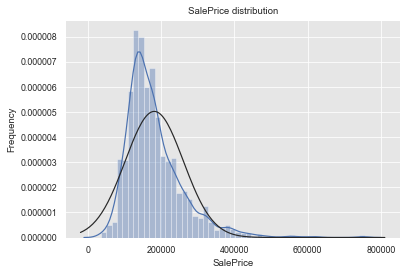

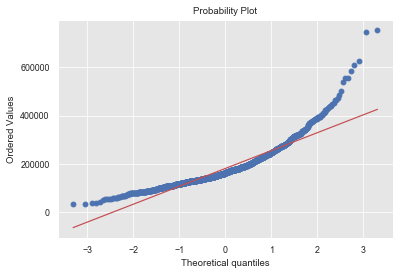

Skewness: 1.882876
Kurtosis: 6.536282


In [389]:
# Exploring the target/class variable to understand data skewness and kurtosis using seaborn
from scipy.stats import skew,norm
sns.distplot(trainset.SalePrice,fit=norm);
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trainset['SalePrice']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(trainset['SalePrice'], plot=plt)
plt.show()
#lets check the level of skewedness and kurtosis
print("Skewness: %f" % trainset['SalePrice'].skew())
print("Kurtosis: %f" % trainset['SalePrice'].kurt())

In [135]:
#From the plot above it is correct to say that the test data is highly skewed
print("Skewness: %f" % trainset['SalePrice'].skew())
print("Kurtosis: %f" % trainset['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


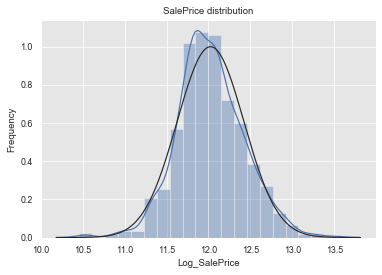

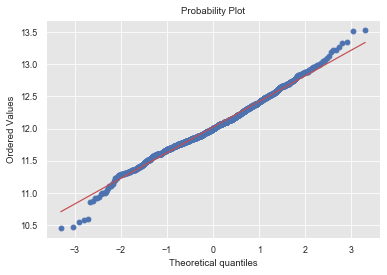



Skewness: 0.121335
Kurtosis: 0.809532


In [391]:
#Log Transformation and input to new variable 'Log_SalePrice'

trainset['Log_SalePrice'] = np.log(trainset['SalePrice'])

#Plotting the log transformed data
sns.distplot(trainset['Log_SalePrice'], bins = 20, fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution');
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(trainset['Log_SalePrice']);
# QQ-plot
fig = plt.figure()
res = stats.probplot(trainset['Log_SalePrice'], plot=plt)
plt.show()
print('\n')
print("Skewness: %f" % trainset['Log_SalePrice'].skew())
print("Kurtosis: %f" % trainset['Log_SalePrice'].kurt())

In [137]:
#Dropping the initial untransformed 'SalePrice' column

trainset = trainset.drop('SalePrice', axis = 1)

### Handling Missing Values



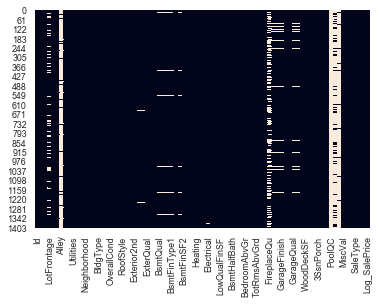

In [401]:
#Visualizing missing value patterns in our variables using snsheatmap
sns.heatmap(trainset.isnull(), cbar=False)

#### Categorical columns

In [138]:
#Obtaining all the categorical columns as a list
print(trainset.dtypes[trainset.dtypes == 'object'].index, '\n')
print("Number of categorical columns: ", len(trainset.dtypes[trainset.dtypes == 'object'].index))


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object') 

Number of categorical columns:  43


#### Numerical Columns

In [139]:
#Obtaining all the numerical columns as a list

print(trainset.dtypes[trainset.dtypes != 'object'].index, '\n')
print("Number of numeric columns: ", len(trainset.dtypes[trainset.dtypes != 'object'].index))

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Log_SalePrice'],
      dtype='object') 

Number of numeric columns:  38


In [140]:
#Getting a random sample of categorical columns
categorical = trainset.dtypes[trainset.dtypes == 'object'].index
trainset[categorical].sample(7)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1163,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,CarPort,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Alloca
1022,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,LwQ,Unf,GasA,Gd,Y,FuseA,TA,Typ,NaN,Detchd,Unf,Fa,Fa,Y,NaN,NaN,NaN,WD,Normal
1113,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
181,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Stucco,Stucco,None,TA,TA,BrkTil,Fa,TA,No,LwQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Normal
228,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Fa,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
647,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,Stone,TA,TA,CBlock,TA,TA,Mn,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
775,RM,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,Norm,TwnhsE,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,Ex,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [141]:
#Getting a random sample of numeric columns in a dataframe
numeric = trainset.dtypes[trainset.dtypes != 'object'].index
trainset[numeric].sample(7)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Log_SalePrice
527,528,60,67.0,14948,9,5,2008,2008,268.0,1330,0,122,1452,1476,1237,0,2713,1,0,2,1,3,1,11,1,2008.0,3,858,126,66,0,0,0,0,0,11,2008,13.008659
821,822,20,60.0,6000,4,4,1953,1953,0.0,0,0,936,936,936,0,0,936,0,0,1,0,2,1,4,0,1974.0,2,576,0,32,112,0,0,0,0,2,2009,11.440355
370,371,60,NaN,8121,6,5,2000,2000,0.0,0,0,953,953,953,711,0,1664,0,0,2,1,3,1,7,1,2000.0,2,460,100,40,0,0,0,0,0,1,2006,12.057573
657,658,70,60.0,7200,7,6,1931,2000,0.0,0,0,776,776,851,651,0,1502,0,0,1,1,3,1,6,1,1931.0,1,270,0,0,112,0,0,0,0,2,2008,11.911702
558,559,60,57.0,21872,7,5,1996,1997,0.0,604,0,125,729,729,717,0,1446,0,1,2,1,3,1,6,1,1996.0,2,406,264,22,0,0,0,0,0,8,2008,12.072541
362,363,85,64.0,7301,7,5,2003,2003,500.0,0,0,0,0,495,1427,0,1922,0,0,3,0,4,1,7,1,2003.0,2,672,0,0,177,0,0,0,0,7,2009,12.198544
136,137,20,NaN,10355,5,5,1967,1967,196.0,695,0,519,1214,1214,0,0,1214,0,0,2,0,3,1,5,1,1967.0,1,318,0,111,0,0,0,0,0,7,2007,11.870600


In [142]:
#Obtaining the percentage of missing values in each column
total = trainset.isnull().sum().sort_values(ascending = False)
percent = (trainset.isnull().sum() / trainset.isnull().count()).sort_values(ascending = False)

data_missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
data_missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [143]:
#Replacing the NaN(Not a number) entries as some contain meaningful information.
#This is done for both the train and test data

filcol = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']
#the na columns are filled with none
for col in filcol:
    trainset[col].fillna('None', inplace = True)
    testset[col].fillna('None', inplace = True)

In [144]:
#  Function that replaces missing data and outputs a dataframe with the new percentages of missing values
def is_missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    
    is_missing = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    
    return is_missing.head(20)



In [145]:
# Printing out missing data from the trainset
is_missing(trainset)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Log_SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
Exterior2nd,0,0.000000
MasVnrType,0,0.000000


In [146]:
#Printing out the missing data from the trainset
is_missing(testset)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFinSF2,1,0.000685
BsmtUnfSF,1,0.000685
TotalBsmtSF,1,0.000685
BsmtFinSF1,1,0.000685
GarageCars,1,0.000685


#### Imputing with Mean
- The remaining na values are imputed using the means of their specific columns. Imputing using the mean is preferred as it takes into account/factors in the entire sample size.
- However the variability is reduced and the standard deviations and variances tend to be underestimated

In [147]:
trainset.fillna(trainset.mean(), inplace = True)
testset.fillna(testset.mean(), inplace = True)

In [148]:
trainset.isnull().sum().sort_values(ascending = False).sum()

0

In [149]:
testset.isnull().sum().sort_values(ascending = False).sum()

0

In [150]:
#Printing a list of the numeric features
print(list(numeric))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Log_SalePrice']


In [152]:
for df in [trainset, testset]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace = True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace = True, axis = 1)

In [153]:
print(trainset['LotArea_Log'].skew(), '\n',
      trainset['LotArea_Log'].kurt())

-0.1379938086958118 
 4.713358369108622


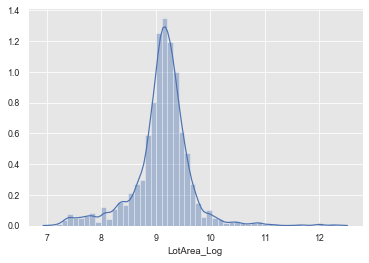

In [154]:
sns.distplot(trainset['LotArea_Log'])

In [155]:
#After the editions made to some of the variables
numeric = trainset.dtypes[trainset.dtypes != 'object'].index
trainset[numeric].head()

,Id,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Log_SalePrice,GrLivArea_Log,LotArea_Log
0,1,60,65.0,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,7.444249,9.041922
1,2,20,80.0,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,7.140453,9.169518
2,3,60,68.0,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,7.487734,9.328123
3,4,70,60.0,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849398,7.448334,9.164296
4,5,60,84.0,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429216,7.695303,9.565214


#### Visualizing the Relationships between  Features and Target Variable
- `regplot` is used in the visualization of two features' relationships in the given dataset i.e. the relations between different features and the target feature in this case `'Log_SalePrice'`

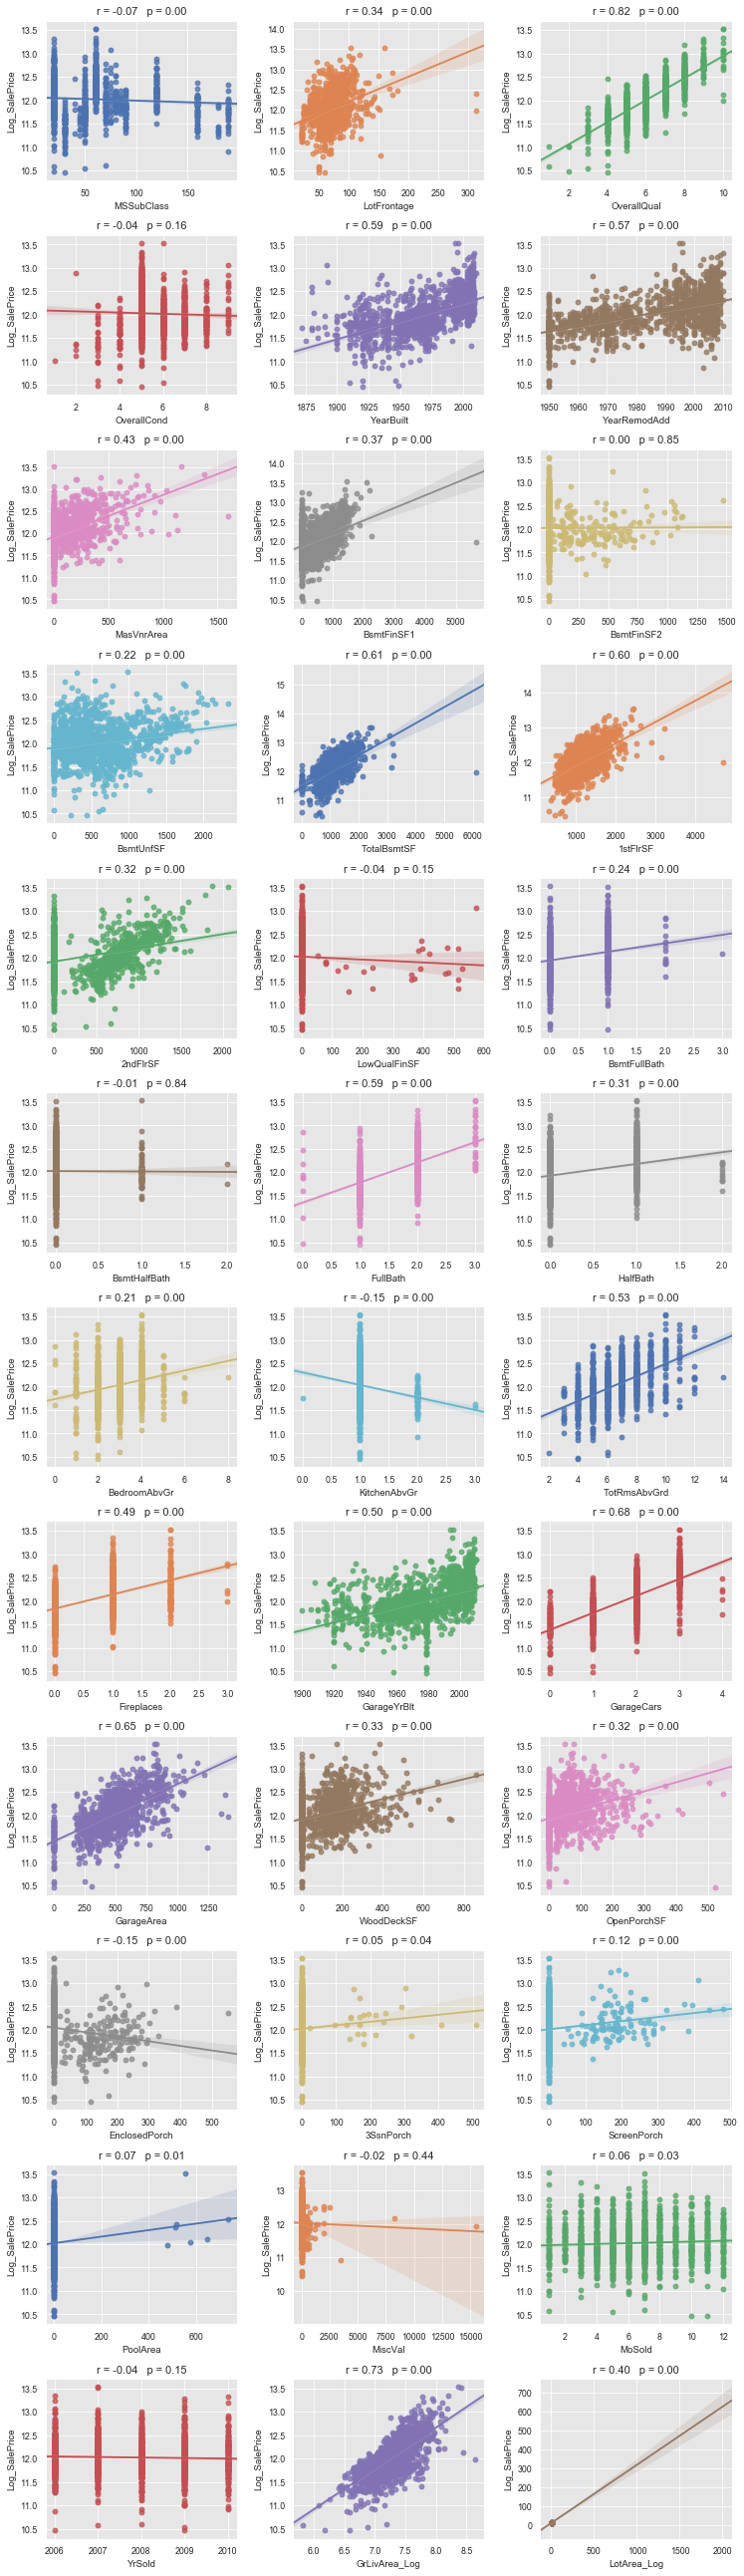

In [156]:
#Plotting for the visualization of relationships between a few selected features and the target feature
row = 12
col = 3

fig, axs = plt.subplots(12, 3, figsize = (col*3.5, row*3))

feats = list(numeric)
not_plot = ['Id', 'SalePrice', 'Log_SalePrice']
featsplot = [c for c in list(numeric) if c not in not_plot]

for r in range(0, row):
    for c in range(0, col):
        i = r*col+c
        if i < len(featsplot):
            sns.regplot(trainset[featsplot[i]], trainset['Log_SalePrice'], ax = axs[r][c])
            
            statp = stats.pearsonr(trainset[featsplot[i]], trainset['Log_SalePrice'])
#statp returns float figures, the p- value and the correlation coefficient (r).
# The correlation coefficient (r), measures the linear relationships between features under observation.

            str_title = 'r = ' + '{0:.2f}'.format(statp[0]) + '   ' 'p = ' + '{0:.2f}'.format(statp[1])
            axs[r][c].set_title(str_title, fontsize = 11)
            
plt.tight_layout()
plt.show()

In [157]:
trainset['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

#### Dealing with Outliers
- Another important step was to check for outliers. This can be done by analyzing  the most important indicators for sale price: Ground Living Area and Overall Quality. This allowed us to identify two outliers which were then eliminated from the data set:

In [158]:
#Dropping Outliers 'OverallQual' feature

trainset = trainset.drop(trainset[(trainset['OverallQual'] == 10) & (trainset['Log_SalePrice']<12.3)].index)

In [159]:
#Dropping outliers in the 'GrLivArea_Log' feature

trainset = trainset.drop(trainset[(trainset['GrLivArea_Log']>8.3) & (trainset['Log_SalePrice']<12.5)].index)

In [160]:
#To check the dimensions of the trainset dataframe
trainset.shape

(1458, 81)

### Correlation
- Correlation refers to the relationship between two variables and how they affect or may not affect the change in each other. This is normaly done using the Pearsons's correlation coefficient. This method assumes a normal distribution between the attributes involved. In this case the correlation of these variables is calculated against the target variable.

### The correlation between the numerical variables and the target variable

In [161]:
#calculation of the correlation coefficient with respect to target feature

cor = trainset.corr()
cor_abs = cor.abs()
target = 'Log_SalePrice'
#To return the n number of rows, ordered by the columns with the largest correlation values in descending order
num_ft = len(numeric)
c_ord = cor_abs.nlargest(num_ft, target)[target] 
print(c_ord)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: Log_Sa

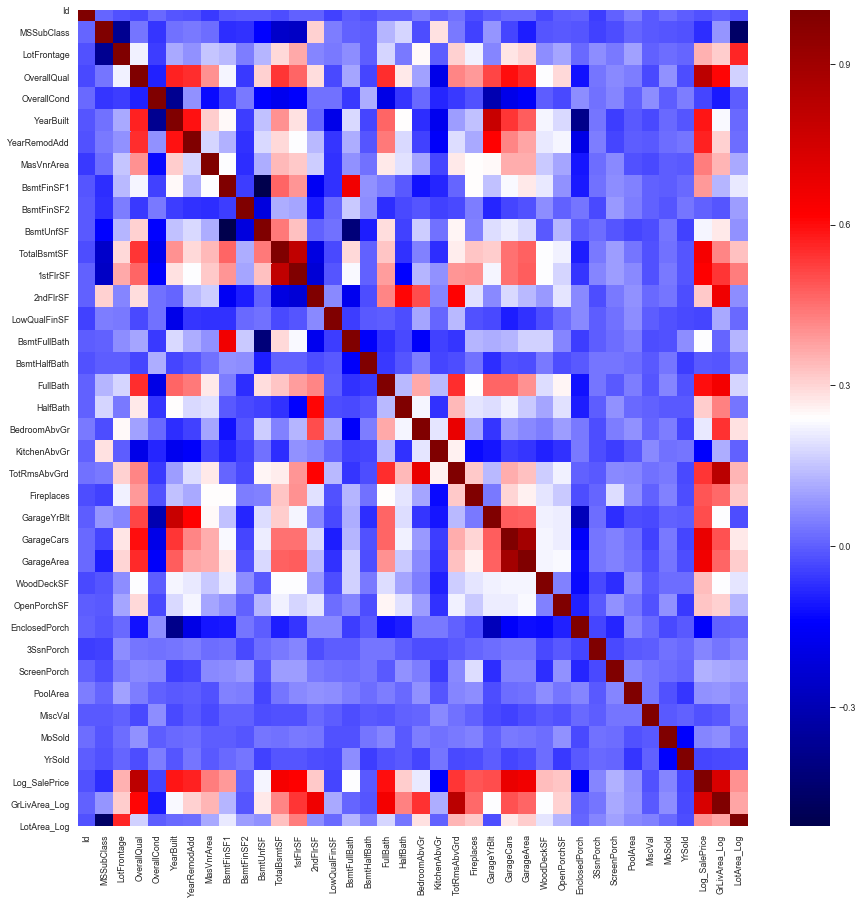

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(trainset.corr(method='pearson'),cmap='seismic')

In [163]:
#Setting a minimum correlation threshold of 0.5
mincorval = 0.5

above_thresh = list(c_ord[c_ord.values > mincorval].index)
print(above_thresh)

['Log_SalePrice', 'OverallQual', 'GrLivArea_Log', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt']


In [164]:
#Printing out all the columns with a correlation values below set threshold in a list
below_thresh = list(c_ord[c_ord.values < mincorval].index)
print(below_thresh)

['Fireplaces', 'MasVnrArea', 'LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [165]:
print(c_ord)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
GarageCars       0.681033
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Fireplaces       0.491998
MasVnrArea       0.433353
LotArea_Log      0.402814
BsmtFinSF1       0.392283
LotFrontage      0.352432
WoodDeckSF       0.334250
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209036
EnclosedPorch    0.149029
KitchenAbvGr     0.147534
ScreenPorch      0.121245
PoolArea         0.074338
MSSubClass       0.073969
MoSold           0.057064
3SsnPorch        0.054914
LowQualFinSF     0.037951
YrSold           0.037151
OverallCond      0.036821
MiscVal          0.020012
Id               0.017774
BsmtHalfBath     0.005124
BsmtFinSF2       0.004863
Name: Log_Sa

- As mentioned above, the skewness and kurtosis of the selected variables based on correlation will be looked at and rectified using `log transformation`.

In [166]:
#Checking the skewness and kurtosis of the selected numerical features based on correlation.
for col in above_thresh:
    print('{:15}'.format(col),
         'Skewness: {:06.5f}'.format(trainset[col].skew()), '  ',
          
         'Kurtosis: {:06.5f}'.format(trainset[col].kurt()))

Log_SalePrice   Skewness: 0.12157    Kurtosis: 0.80476
OverallQual     Skewness: 0.20079    Kurtosis: 0.07496
GrLivArea_Log   Skewness: -0.07182    Kurtosis: 0.09633
GarageCars      Skewness: -0.34238    Kurtosis: 0.22211
GarageArea      Skewness: 0.13175    Kurtosis: 0.76129
TotalBsmtSF     Skewness: 0.51170    Kurtosis: 1.77011
1stFlrSF        Skewness: 0.88764    Kurtosis: 1.11739
FullBath        Skewness: 0.03127    Kurtosis: -0.86997
YearBuilt       Skewness: -0.61229    Kurtosis: -0.43983
YearRemodAdd    Skewness: -0.50184    Kurtosis: -1.27392
TotRmsAbvGrd    Skewness: 0.66050    Kurtosis: 0.85758
GarageYrBlt     Skewness: -0.66718    Kurtosis: -0.26665


  -  For skewness to be regarded fit for normal distribution, it ranges from between (−1,1) and (−2,2) for kurtosis is an acceptable range for being normally distributed. From above, all the values fall within that acceptable range.

### The correlation between the categorical variables and the target variable

In [167]:
print(list(categorical))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [168]:
#Printing the value counts in each of the categorical variable columns

for cat in list(categorical):
    print(trainset[cat].value_counts(), '\n', '_'*25) #Printing the output in a newline


RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 
 _________________________
Pave    1452
Grvl       6
Name: Street, dtype: int64 
 _________________________
None    1367
Grvl      50
Pave      41
Name: Alley, dtype: int64 
 _________________________
Reg    925
IR1    483
IR2     41
IR3      9
Name: LotShape, dtype: int64 
 _________________________
Lvl    1311
Bnk      61
HLS      50
Low      36
Name: LandContour, dtype: int64 
 _________________________
AllPub    1457
NoSeWa       1
Name: Utilities, dtype: int64 
 _________________________
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 
 _________________________
Gtl    1380
Mod      65
Sev      13
Name: LandSlope, dtype: int64 
 _________________________
NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide   

In [169]:
print(len(categorical))

43


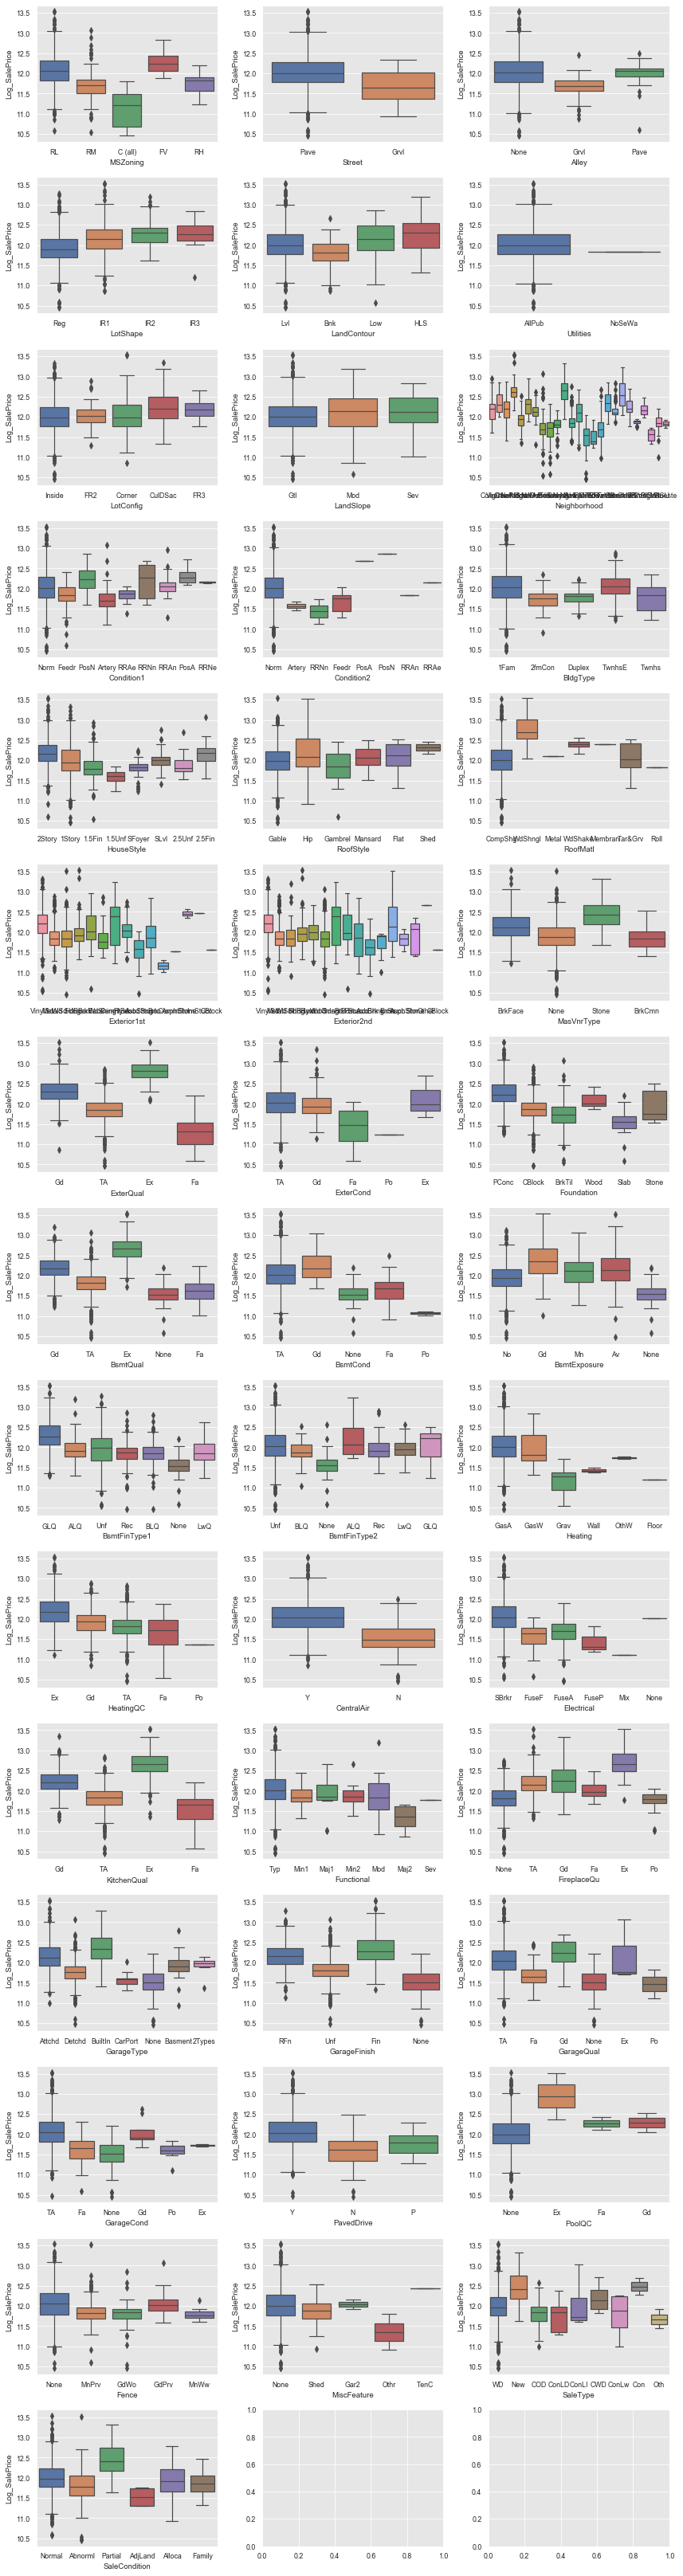

In [170]:
#Relationsship to the target feature:Log_SalePrice in a boxplot

categ_list = list(categorical)
n_rows = 15
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*4, n_rows*3))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols+c
        if i < len(categ_list):
            sns.boxplot(x = categ_list[i], y = target, data = trainset, ax = axs[r][c])
            
plt.tight_layout()

- Based on the significant observable variations in the boxplots, the categorical variables(features) with a strong correlation with subject to the target (variable) feature are selected.

In [171]:
#Features with a strong correlation with the target variable
categ_strongcorr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

In [172]:
#Features with a weak correaltion with the target variable
categ_weakcorr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'GarageCond',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'Condition1', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [173]:
# Creating a function that plots heatmap of each of the numeric features with a correlation greater than the threshold value of 0.5 to the target feature.

def plot_corr_matrix(dat_f, nr_c, targvar) :
    
    cor = dat_f.corr()
    cor_abs = cor.abs()
    cols = cor_abs.nlargest(nr_c, targvar)[targvar].index
    cm = np.corrcoef(dat_f[cols].values.T)
    
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )

In [174]:
above_thresh # Features with a correlation above threshold

['Log_SalePrice',
 'OverallQual',
 'GrLivArea_Log',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt']

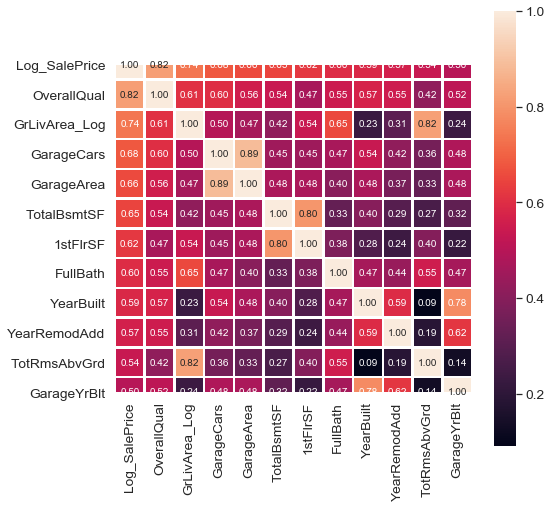

In [175]:

len_above = len(above_thresh)

plot_corr_matrix(trainset, len_above, target)

### Data Transformation/Wrangling
- To enable easier data manipulation it is normally recommended to transform data and map it from one form to another to create uniformity and make it more appropriate for analytical purposes. This is done in both the train and the test data to ensure that uniformity is upheld.



In [176]:
#Dropping the first column Id from the testset dataframe
id_test = testset['Id'] 

to_drop_num  = below_thresh
to_drop_catg = categ_weakcorr

dropcols = to_drop_num + to_drop_catg 

for df in [trainset, testset]:
    df.drop(dropcols, inplace= True, axis = 1)

In [177]:
print(below_thresh)

['Fireplaces', 'MasVnrArea', 'LotArea_Log', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [178]:
#Obtaining the new dimensions of the dataframe
testset.shape

(1459, 21)

In [179]:
#The Neighborhood feature was removed to be plotted separately
categ_st = categ_strongcorr.copy()
categ_st.remove('Neighborhood')

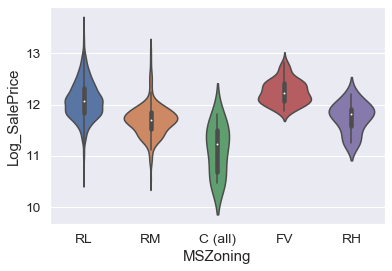

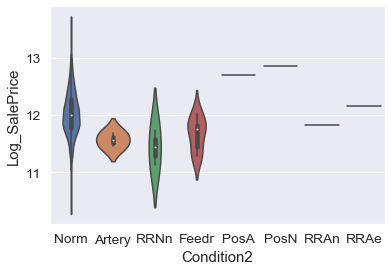

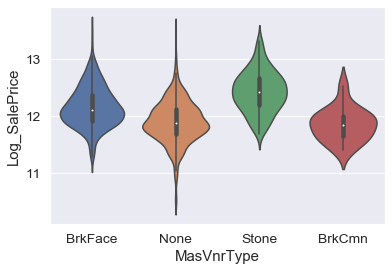

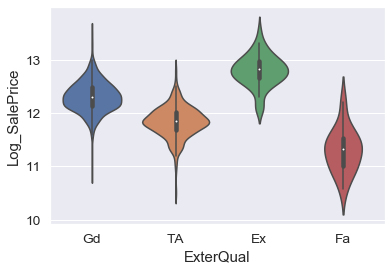

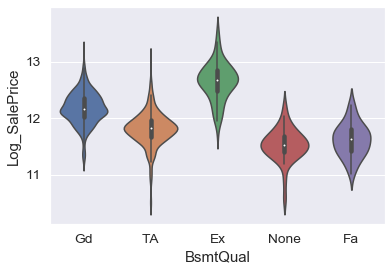

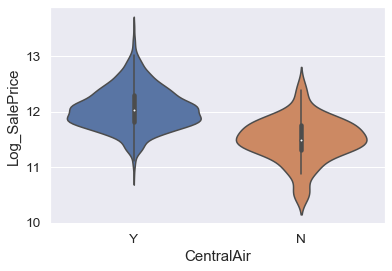

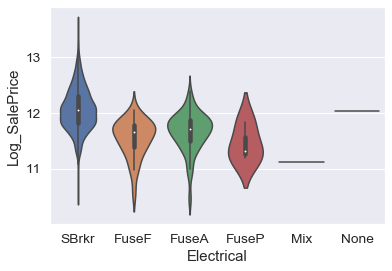

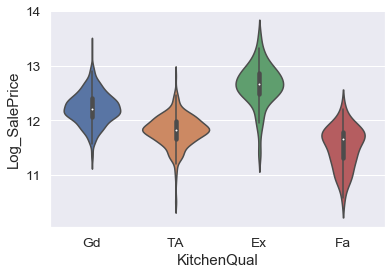

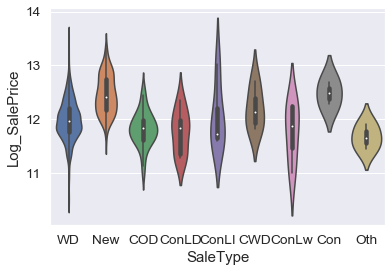

In [180]:
for cat in categ_st:
    sns.violinplot(x=cat, y=target, data = trainset)
    plt.show()

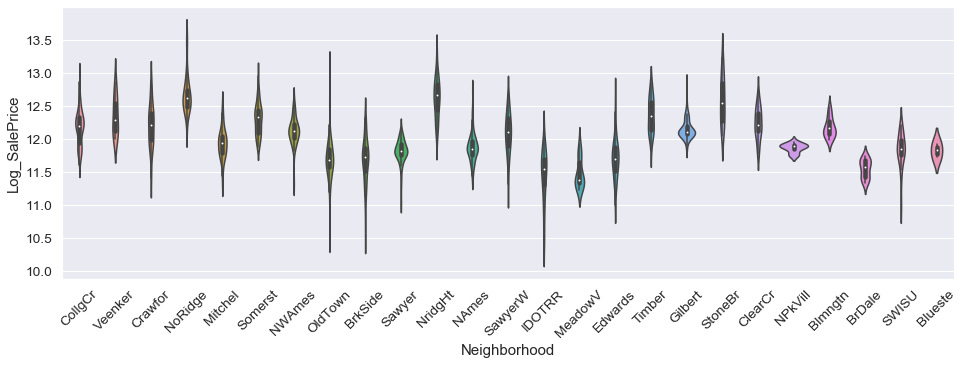

In [181]:
# Violinplot plotting the neighborhood variable against the target variable 
plt.figure(figsize = (16,5))

sns.violinplot(x= 'Neighborhood', y = target, data = trainset)
plt.xticks(rotation = 45)
plt.show()


In [182]:
#Printing the list containing the names of the remaining categorical string variables
print(categ_st)

['MSZoning', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual', 'CentralAir', 'Electrical', 'KitchenQual', 'SaleType']


In [183]:
#To obtain the mean Saleprice of qeach of the unique values for each of the categorical columns including neighborhood column:
print(trainset.groupby('Neighborhood')[target].mean())

Neighborhood
Blmngtn    12.169416
Blueste    11.826536
BrDale     11.547864
BrkSide    11.679727
ClearCr    12.239900
CollgCr    12.163641
Crawfor    12.206659
Edwards    11.705322
Gilbert    12.155803
IDOTRR     11.446889
MeadowV    11.474522
Mitchel    11.933948
NAmes      11.868045
NPkVill    11.866477
NWAmes     12.130609
NoRidge    12.676000
NridgHt    12.619411
OldTown    11.703865
SWISU      11.838435
Sawyer     11.811468
SawyerW    12.090689
Somerst    12.296495
StoneBr    12.585486
Timber     12.363455
Veenker    12.344176
Name: Log_SalePrice, dtype: float64


In [184]:
# Mean values for the unique entries in the other categorical values
for cat in categ_st:
    print(trainset.groupby(cat)[target].mean(), '\n', '\n', '_'*25)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085939
RM         11.692893
Name: Log_SalePrice, dtype: float64 
 
 _________________________
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.860999
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: Log_SalePrice, dtype: float64 
 
 _________________________
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.431016
Name: Log_SalePrice, dtype: float64 
 
 _________________________
ExterQual
Ex    12.792412
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: Log_SalePrice, dtype: float64 
 
 _________________________
BsmtQual
Ex      12.650235
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: Log_SalePrice, dtype: float64 
 
 _________________________
CentralAir
N    11.491858
Y    12.061099
Name: Log_SalePrice, dtype: float64 
 
 _________________________
Electrical

- To transform the unique values in the categorical variables, it is first necessary to classify them. This is done based on the means computed above asshown below.

In [185]:
#Classifying the unique values in the categorical variables based on the computed means

# Neighborhood
nh_categ2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nh_categ3 = ['NoRidge', 'NridgHt', 'StoneBr']

## 'MSZoning'
msz_categ2 = ['RM', 'RH']
msz_categ3 = ['RL', 'FV'] 

# Condition2
con2_categ2 = ['Norm', 'RRAe']
con2_categ3 = ['PosA', 'PosN'] 

# SaleType
ST_categ1 = ['Oth']
ST_categ3 = ['CWD']
ST_categ4 = ['New', 'Con']



In [186]:
# Converting the categorical variables to numeric columns in the trainset and testset
# This is done by outputting them in separate columns.

for df in [trainset, testset]:
    
    df['msz_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_categ2) ), 'msz_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_categ3) ), 'msz_num'] = 3        
    
    df['nh_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nh_categ2) ), 'nh_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nh_categ3) ), 'nh_num'] = 3    

    df['cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(con2_categ2) ), 'cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(con2_categ3) ), 'cond2_num'] = 3    
    
    df['mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 
    
    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['st_num'] = 2       
    df.loc[(df['SaleType'].isin(ST_categ1) ), 'st_num'] = 1  
    df.loc[(df['SaleType'].isin(ST_categ3) ), 'st_num'] = 3  
    df.loc[(df['SaleType'].isin(ST_categ4) ), 'st_num'] = 4

- The correlaton of the new columns created with respect to the target variable are shown below.

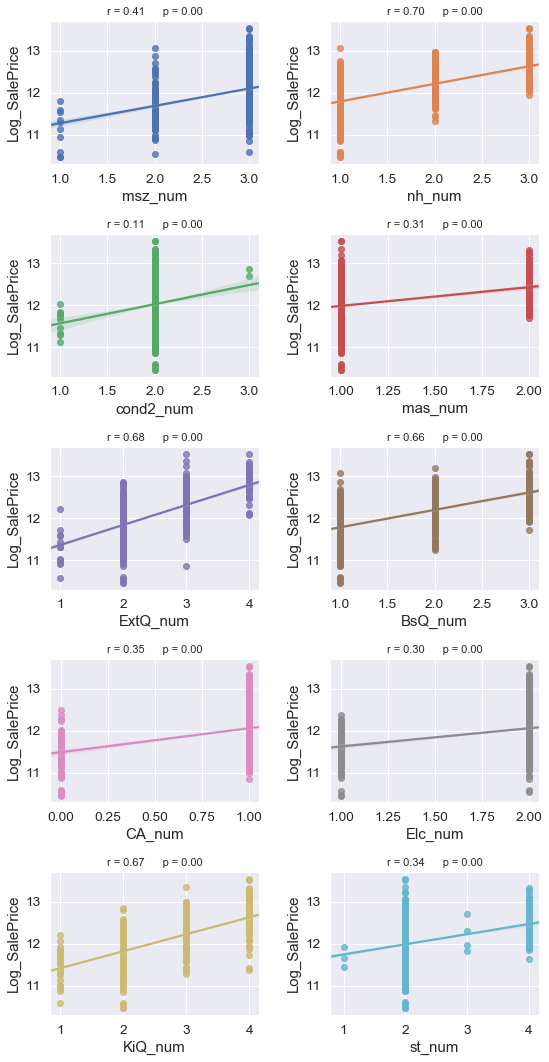

In [187]:
#correlation of the new numerical columns to the Log_SalePrice

new_col_num = ['msz_num', 'nh_num', 'cond2_num', 'mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'st_num']

nr_rows = 5
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))
plt.subplots_adjust(bottom=1,right=2, top=3)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(trainset[new_col_num[i]], trainset[target], ax = axs[r][c])
            stp = stats.pearsonr(trainset[new_col_num[i]], trainset[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)

plt.tight_layout()    
plt.show()
           

In [188]:
# This can be output as shown below:
corev = trainset.corr()
cor_abs = corev.abs()

allcols = len(trainset)
ser_corr_1 = cor_abs.nlargest(allcols, target)[target]
print(ser_corr_1)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
nh_num           0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
msz_num          0.409423
CA_num           0.351598
st_num           0.337469
mas_num          0.313280
Elc_num          0.304857
cond2_num        0.107610
Name: Log_SalePrice, dtype: float64


- From the results obtained above, the categorical columns and the new numeric columns which have less than a threshold coefficient of (0.5)

In [189]:
#Dropping variables that do not meet the threshold coefficient for both the trainset and testset

cat_colsdrop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
cols_below_corr = list(ser_corr_1[ser_corr_1.values <= mincorval].index)


for df in [trainset, testset] :
    df.drop(cat_colsdrop, inplace= True, axis = 1)
    df.drop(cols_below_corr, inplace= True, axis = 1)

- Obtaining the edited/ modified columns in terms of their correlation to the target variable 

In [190]:
#Variables from the modified trainset dataframe
corr2 = trainset.corr()
corr_abs_2 = corr2.abs()

all_cols = len(trainset)
ser_corr_2 = corr_abs_2.nlargest(all_cols, target)[target]

print(ser_corr_2)

Log_SalePrice    1.000000
OverallQual      0.821404
GrLivArea_Log    0.737427
nh_num           0.696962
ExtQ_num         0.682225
GarageCars       0.681033
KiQ_num          0.669989
BsQ_num          0.661286
GarageArea       0.656128
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
TotRmsAbvGrd     0.537702
GarageYrBlt      0.500842
Name: Log_SalePrice, dtype: float64


- Similar to what was done for the numerical variables, the skewness and kurtosis of the selected categorical features is checked and corrected prior to modeling.

In [191]:
# Creating a list of the categorical variables above correlation threshold.
cat_abov = list(ser_corr_2[ser_corr_2.values > mincorval].index)
print(cat_abov)


['Log_SalePrice', 'OverallQual', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt']


In [192]:
#Checking the skewness and kurtosis of the selected caterogical features based on correlation.
for col in cat_abov:
    print('{:15}'.format(col),
         'Skewness: {:06.5f}'.format(trainset[col].skew()), '  ',
          
         'Kurtosis: {:06.5f}'.format(trainset[col].kurt()))

Log_SalePrice   Skewness: 0.12157    Kurtosis: 0.80476
OverallQual     Skewness: 0.20079    Kurtosis: 0.07496
GrLivArea_Log   Skewness: -0.07182    Kurtosis: 0.09633
nh_num          Skewness: 0.77414    Kurtosis: -0.51087
ExtQ_num        Skewness: 0.82005    Kurtosis: 0.05037
GarageCars      Skewness: -0.34238    Kurtosis: 0.22211
KiQ_num         Skewness: 0.38418    Kurtosis: -0.24343
BsQ_num         Skewness: 0.61980    Kurtosis: -0.58935
GarageArea      Skewness: 0.13175    Kurtosis: 0.76129
TotalBsmtSF     Skewness: 0.51170    Kurtosis: 1.77011
1stFlrSF        Skewness: 0.88764    Kurtosis: 1.11739
FullBath        Skewness: 0.03127    Kurtosis: -0.86997
YearBuilt       Skewness: -0.61229    Kurtosis: -0.43983
YearRemodAdd    Skewness: -0.50184    Kurtosis: -1.27392
TotRmsAbvGrd    Skewness: 0.66050    Kurtosis: 0.85758
GarageYrBlt     Skewness: -0.66718    Kurtosis: -0.26665


- As can be seen above, the skewness and kurtosis of categorical features that meet the threshold correlation is within acceptable range, below (-/+2)

In [193]:
def plot_corr_matrix(df, nr_c, targ) :
    
    cor = df.corr()
    cor_abs = cor.abs()
    cols = cor_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)
    
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )

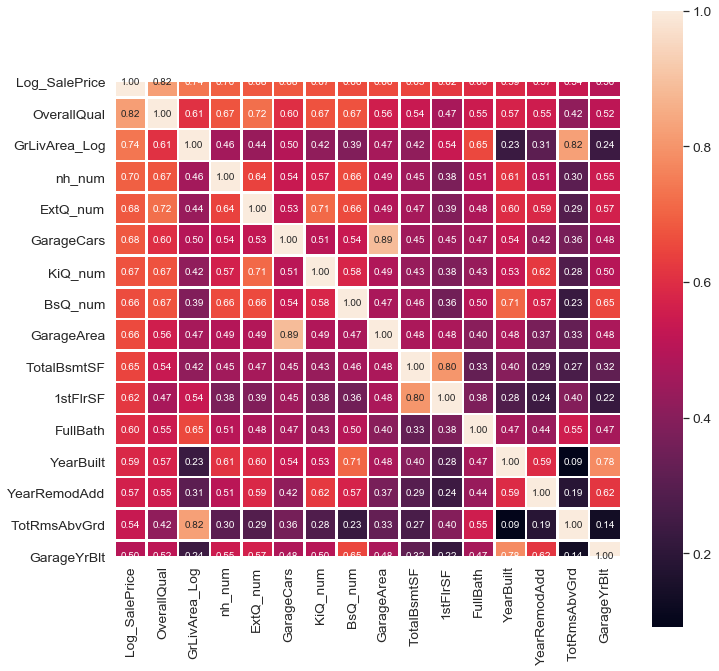

In [194]:
no_feats=len(trainset.columns)
plot_corr_matrix(trainset, no_feats, target)
#plt.subplots_adjust(bottom=1,right=2, top=3)


### Multicolinearity
- To reduce more features, the plot obtained above can be used to check for features that have a high correlation coefficient to one another, above 0.8.
- The metric for dropping such features will be restricted to those that have multicolinearity but have low correlation with the target variable.

In [195]:
cols = list(trainset.columns)
colte = list(testset.columns) 
print(cols)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'Log_SalePrice', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [196]:
#List for the testset
print(colte)


['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [216]:
#Removing columns with high colinearity but low correlation with target variable, and the target variable
for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt', 'Log_SalePrice']:
    if col in colte:
        colte.remove(col)
print(colte)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [197]:
#Dropping columns with high colinearity but low correlation with target variable, and the target variable

for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt', 'Log_SalePrice']:
    if col in cols:
        cols.remove(col)
print(cols)

['MSZoning', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'GarageCars', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'BsQ_num', 'KiQ_num']


In [218]:
features = cols.copy()
feats= colte.copy()

In [221]:
features

['MSZoning',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 'FullBath',
 'GarageCars',
 'GrLivArea_Log',
 'nh_num',
 'ExtQ_num',
 'BsQ_num',
 'KiQ_num']

In [219]:
#To index the Log_SalePrice from the testset as the index, a new variable is created
#v = list(set(feats) - set('Log_SalePrice'))
#v

['TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'GarageCars',
 'KiQ_num',
 'BsQ_num',
 'nh_num',
 'OverallQual',
 'GrLivArea_Log',
 'ExtQ_num',
 'FullBath',
 'MSZoning']

In [222]:
traindf = trainset[features].copy()
testdf = testset[feats].copy()

y = trainset[target]


In [224]:
#Dropping the column MSZoning for both datasets.
#This is beacause as per the metrics used it ranks low in feature importance
traindf = traindf.drop('MSZoning', axis = 1)
testdf = testdf.drop('MSZoning', axis = 1)

In [225]:
#Viewing a sample of the traindf
traindf.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,GarageCars,GrLivArea_Log,nh_num,ExtQ_num,BsQ_num,KiQ_num
99,4,1959,1959,950,1,0,7.110696,1,2,1,2
1438,6,1957,1996,912,1,2,7.119636,1,2,1,2
1383,5,1918,2007,816,2,2,7.255591,1,2,1,3
341,4,1950,1950,721,1,1,6.734592,1,1,1,2
1119,5,1959,1959,1040,1,1,6.946976,1,2,1,2


In [226]:
#Viewing a sample of the testdf
testdf.sample(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,GarageCars,GrLivArea_Log,nh_num,ExtQ_num,BsQ_num,KiQ_num
482,8,1989,1989,1337.0,2,2.0,7.198184,3,3,2,3
382,5,1967,1967,1052.0,1,1.0,6.958448,1,2,1,2
1339,5,1919,1950,610.0,1,0.0,6.708084,1,2,1,3
748,5,1956,1956,1898.0,2,2.0,7.548556,2,2,1,2
1238,6,1990,1991,1398.0,2,2.0,7.242798,1,3,2,3


### Data Preprocessing
- This involves the data normalization and standardization procedures. The function used to carry out this function is sklearn.preprocessing.StandardScaler() function() and it does this by removing the mean and scaling to unit variance. It transforms data in such a way that its distribution will have a mean value of 0 and a standard deviation of 1. 

- The standard score of a sample x is calculated as: `z = (x – u) / s`

`x = variable`

`u = mean`

`s = standard deviation`


In [227]:
traindf.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath',
       'GarageCars', 'GrLivArea_Log', 'nh_num', 'ExtQ_num', 'BsQ_num',
       'KiQ_num'],
      dtype='object')

In [228]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
traindf_sc = sc.fit_transform(traindf)
testdf_sc = sc.fit_transform(testdf)

In [230]:
#Columns for the new dataframes
colsc = list(traindf.columns)
coltesc = list(testdf.columns)

In [233]:
#Converting the ndarray to a pandas dataframe
traindf_sc = pd.DataFrame(data = traindf_sc)
testdf_sc = pd.DataFrame(data = testdf_sc)

In [234]:
#View a random sample of the new dataframe containing the standardized values in the traindf_sc.
traindf_sc.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
514,-0.795092,-1.498112,-1.688130,-0.685896,-1.025620,-1.025802,-1.802301,0.658963,-0.689001,-0.921808,-0.770150
93,-0.068293,-2.028205,0.638051,0.389217,0.793546,0.313159,1.425231,-0.844586,-0.689001,-0.921808,-0.770150
1041,-0.068293,1.119221,0.977286,0.610990,0.793546,0.313159,-0.276433,2.162512,1.061109,0.648281,0.741127
950,-0.795092,-0.206011,-0.961198,-0.541262,-1.025620,-1.025802,-1.192624,-0.844586,-0.689001,-0.921808,-0.770150
1053,1.385305,1.019829,0.831900,0.030043,0.793546,0.313159,0.997237,0.658963,1.061109,0.648281,0.741127


In [235]:
#View a random sample of the new dataframe containing the standardized values in the testdf_sc.
testdf_sc.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
774,-0.054877,0.909893,0.773424,1.400563,0.773083,0.301623,0.537343,0.702569,1.027675,2.147913,0.741758
705,-0.751101,0.745309,0.489377,-0.126793,-1.028720,0.301623,-1.126553,0.702569,-0.678102,0.621461,-0.769730
1011,-0.054877,-1.855116,-1.593638,0.207598,-1.028720,0.301623,1.371126,-0.791671,-0.678102,-0.904990,-0.769730
1235,0.641347,1.107393,1.010131,-0.592230,0.773083,0.301623,0.362593,-0.791671,1.027675,0.621461,0.741758
1163,0.641347,1.107393,1.057472,1.477382,0.773083,1.591258,1.417234,0.702569,1.027675,0.621461,0.741758


#### Splitting the Data
- The data has to be split into X and Y, where Y is the target prior to modelling.

In [241]:
#Setting the X and Y prior to modelling
#Splitting the data to X and the Y(target)

X = traindf.copy() #Creates a recursive copy of the dataframe without affecting the original data
y = trainset[target] #Subsetting the trainset to obtain the target variable to be used for predicting.
X_test = testdf.copy()# Creating a copy of the dataframe to be used as the testset.




In [242]:
#Creating new variables from the standardized dataframes
X_sc = traindf_sc.copy()
Xtesc = testdf_sc.copy()

In [243]:
#Getting column summary information of X training set dataframe
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 11 columns):
OverallQual      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
TotalBsmtSF      1458 non-null int64
FullBath         1458 non-null int64
GarageCars       1458 non-null int64
GrLivArea_Log    1458 non-null float64
nh_num           1458 non-null int64
ExtQ_num         1458 non-null int64
BsQ_num          1458 non-null int64
KiQ_num          1458 non-null int64
dtypes: float64(1), int64(10)
memory usage: 136.7 KB


In [244]:
#Getting column information of X training set dataframe
Xtesc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
0     1459 non-null float64
1     1459 non-null float64
2     1459 non-null float64
3     1459 non-null float64
4     1459 non-null float64
5     1459 non-null float64
6     1459 non-null float64
7     1459 non-null float64
8     1459 non-null float64
9     1459 non-null float64
10    1459 non-null float64
dtypes: float64(11)
memory usage: 125.5 KB


### Modelling

- This first using a grid search for selecting the best hyperparameters for the model to be used. These models are imported from sci-kit learn. This is done by tuning hyperparameters that are specified based on a specific scoring parameter. The best hyperparameters for a model are those that give the best scoring values/metrics.
- The following regressors from sklearn were used: `Linear Regression`, `Ridge Regression`,`Lasso`, `Stochastic Gradient Descent`, `Elastic Net`, `Random Forest Regresor`, `XGBoost` and the `DecisionTreeRegressor`. 
- Below a function is specified that performs a gridsearch and outputs the best RMSE (Root Mean Square Error value) that is generated from the best parameters.


In [245]:
#Gridsearch function

nr_cv = 7 #No of folds

def get_best_score(grid):
    
    best_score = np.sqrt(-grid.best_score_)
    print(best_score, '\n')    
    print(grid.best_params_, '\n')
    print(grid.best_estimator_)
    
    return best_score

- It is important to note **Cross validation** is done within the gridsearch as specified in the above function.
- A model is trained using `k-1` of the folds of the training data, while the resulting model is then validated on the remaining part of the data.

In [246]:
from sklearn.model_selection import GridSearchCV
scor = 'neg_mean_squared_error' # Metric for tuning the hyperparameter that will be used to evaluate prediction on the test data

In [250]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
parameters = {'fit_intercept':[True,False], 'normalize':[True], 'copy_X':[True, False]}
grid_linear = GridSearchCV(lin_reg, parameters, cv=nr_cv, verbose=1 , scoring = scor)
grid_linear.fit(X_sc, y)

linearsc = get_best_score(grid_linear)

Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1504951710499308 

{'copy_X': True, 'fit_intercept': True, 'normalize': True} 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.1s finished


In [248]:
linearsc = get_best_score(grid_linear)

0.1504951710499308 

{'copy_X': True, 'fit_intercept': True, 'normalize': True} 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [249]:
lin = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
lin.fit(X_sc, y)
pred_lin = lin.predict(Xtesc)

In [252]:
newtest_df = pd.read_csv('test.csv')
newtest_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [254]:
linreg = pd.DataFrame()# Creating a new data frame and storing it in a new variable
linreg['Id'] = newtest_df['Id'] #Subsetting the `Id` from the newtest_df dataframe.

#The irrational number e is also known as Euler’s number and is the base of the natural logarithm
linreg['SalePrice'] = np.exp(pred_lin) #Natural Log

linreg.sample(5)# Obtaining 5 random entries from the dataframe

,Id,SalePrice
797,2258,182715.405023
76,1537,84836.233771
1428,2889,72249.003562
1318,2779,128175.828253
1130,2591,199757.943639


### Lasso Regression
- Lasso regression (**Least Absolute Shrinkage and Selection Operator**) also known as L1 regularization is pretty much similar to the *ridge* regularization in that it penalizes large coefficients making the model prefer smaller coefficients/weights.
- In this type of regularization, the weights shrink by a constant amount towards 0 while in ridge regression the weights shrink by an amount proportional to *w* (the slope). So when a specific weight has a large magnitude, |w|, L1 regularization shrinks the weight much less than L2 regularization does. By contrast, when |w| is small, L1 regularization shrinks the weight much more than L2 regularization.
- L1 / Lasso regularization net result tends to concentrate the weight of the network in a relatively small number of high-importance connections (perform feature selection), while the other weights are propelled towards zero meaning that some of the features are entirely disregarded for the output evaluation. Lasso can therefore be an important tool in feature selection too.

In [357]:
from sklearn.linear_model import Lasso

lasso = Lasso()
#Setting alpha for regularization
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1,10,100], 'normalize':[True,False], 'max_iter': [10e5], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
#Loading the folds from the gridsearch
grid_lasso = GridSearchCV(lasso, parameters, cv=nr_cv, verbose=1, scoring = scor)
#Fitting the model
grid_lasso.fit(X_sc, y)

lasso_sc = get_best_score(grid_lasso)

Fitting 7 folds for each of 96 candidates, totalling 672 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.15046130706418617 

{'alpha': 0.001, 'max_iter': 1000000.0, 'normalize': False, 'tol': 0.0001} 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=1)]: Done 672 out of 672 | elapsed:    4.3s finished


In [358]:
#Getting the best score
lasso_sc = get_best_score(grid_lasso)

0.15046130706418617 

{'alpha': 0.001, 'max_iter': 1000000.0, 'normalize': False, 'tol': 0.0001} 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


#### Ridge Regression
- Ridge regression (also known as *L2 regularization*) is one among the techniques used to reduce model complexity and prevent overfitting that may be as a result of linear regression. In this model the cost function is altered by incorporating a penalty equivalent to square of the magnitude of the coefficients. It hence shrinks the coefficient helping reduce multi-colinearity and complexity
- Together with LASSO and Elastic-Net, they are regularization techniques that are employed for penalization of large coefficients. This avoids overfitting. However, the strength of the penalty should be tuned.
- **Alpha** is a parameter for regularization. It is also known as a **penalty term**, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. Similarly, decreasing alpha may fix high bias (a sign of underfitting) by encouraging larger weights, potentially resulting in a more complicated decision boundary.



In [359]:
from sklearn.linear_model import Ridge

ridge = Ridge()
#Alpha Regularization
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1,10,100], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
#Note that 'Alpha - Regularization strength' is set at different values.
grid_ridge = GridSearchCV(ridge, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_ridge.fit(X_sc, y)

ridge_sc = get_best_score(grid_ridge)

Fitting 7 folds for each of 64 candidates, totalling 448 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.15048119151049066 

{'alpha': 0.01, 'normalize': True, 'tol': 1e-06} 

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=1e-06)


[Parallel(n_jobs=1)]: Done 448 out of 448 | elapsed:    3.8s finished


In [360]:
#Getting the best score
ridge_sc = get_best_score(grid_ridge)

0.15048119151049066 

{'alpha': 0.01, 'normalize': True, 'tol': 1e-06} 

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=1e-06)


### Elastic Net Regression
- This is also a penalized regularization model which basically combines penalties from both L1 and L2 regularization.
- It aims at reducing the loss function where α is the mixing parameter between ridge (α = 0) and lasso (α = 1) creating a penalty which is a combination between L1 and L2.



In [260]:
from sklearn.linear_model import ElasticNet

elas = ElasticNet()
#Setting the parameters
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_elas = GridSearchCV(elas, parameters, cv=nr_cv, verbose=1, scoring = scor)
#Fitting the model
grid_elas.fit(X_sc, y)
#Requesting the best score form the gridsearch
sc_elas = get_best_score(grid_elas)

Fitting 7 folds for each of 360 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.15176222908398573 

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01} 

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.01,
           max_iter=1000000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.01, warm_start=False)


[Parallel(n_jobs=1)]: Done 2520 out of 2520 | elapsed:   14.8s finished


In [261]:
#Printing out the best score from the model
sc_elas = get_best_score(grid_elas)

0.15176222908398573 

{'alpha': 0.1, 'fit_intercept': True, 'l1_ratio': 0.01, 'max_iter': 1000000, 'normalize': False, 'tol': 0.01} 

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.01,
           max_iter=1000000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.01, warm_start=False)


### SGD Regressor
- SGD stands for stochastic Gradient Descent. In this model, the gradient of the loss is estimated each sample at a time, and the model is updated along the way with a decreasing learning rate.
- The regularizer used is a penalty added to the loss function that shrinks the model parameters towards 0, using L2 (α = 0) and L1 (α = 1) or a combination of both (elastic net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve feature selection.

In [262]:
from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor()
parameters = {'max_iter' :[10000, 10e5], 'alpha':[1e-05, 1e-04, 1e-03, 1e-02, 1e-01], 'epsilon':[1e-02], 'fit_intercept' : [True, False], 'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] }
grid_sgdr = GridSearchCV(sgdr, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_sgdr.fit(X_sc, y)

sc_sgdr = get_best_score(grid_sgdr)

Fitting 7 folds for each of 80 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1504292336993907 

{'alpha': 0.001, 'epsilon': 0.01, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000000.0} 

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.01,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_epsilon_insensitive',
             max_iter=1000000.0, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:    4.9s finished


In [361]:
#Printing out the best SGD score
sc_sgdr = get_best_score(grid_sgdr)

0.1504292336993907 

{'alpha': 0.001, 'epsilon': 0.01, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000000.0} 

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.01,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_epsilon_insensitive',
             max_iter=1000000.0, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)


### Decision Tree Regressor
- Decision Trees  are a non-parametric supervised learning method. They can be used for both classification and regression. 
- They aim at creating a model that predicts the value of a target variable by learning simple decision rules inferred from the features of the data.

In [264]:
from sklearn.tree import DecisionTreeRegressor

# Setting the working parameters
# max_depth is The maximum depth of the tree.
# max_features are the number of features to consider when looking for the best split.
# min_samples_split are the minimum number of samples required to split an internal node
# min_samples_leaf is the minimum number of samples required to be at a leaf node

param_grid = { 'max_depth' : [7,8,9,10] , 'max_features' : [7, 8, 9, 10] , 'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30], 'presort': [False,True] , 'min_samples_leaf': [8, 10, 12, 14]}
            
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = scor)
grid_dtree.fit(X_sc, y)

dtree = get_best_score(grid_dtree)

Fitting 7 folds for each of 1920 candidates, totalling 13440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.17348907451293297 

{'max_depth': 10, 'max_features': 9, 'max_leaf_nodes': None, 'min_samples_leaf': 8, 'min_samples_split': 20, 'presort': False} 

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=9,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


[Parallel(n_jobs=1)]: Done 13440 out of 13440 | elapsed:   45.9s finished


In [265]:
#Printing out the best DTR score
dtree = get_best_score(grid_dtree)

0.17348907451293297 

{'max_depth': 10, 'max_features': 9, 'max_leaf_nodes': None, 'min_samples_leaf': 8, 'min_samples_split': 20, 'presort': False} 

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=9,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [271]:
pred_dtr = grid_rf.predict(Xtesc)
print(len(pred_dtr))

1459


In [272]:
#Transforming the final output
final_result = pd.DataFrame()
final_result['SalePrice'] = np.exp(pred_dtr)
final_result.head(10)

,SalePrice
0,111113.926521
1,147386.060157
2,171530.803454
3,193192.862054
4,196354.807187
5,189437.553307
6,171198.061928
7,178953.041134
8,183730.258041
9,116705.384166


In [280]:
import pip
pip.main(['install', 'xgboost'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

### XGBoost
- XGBoost is an optimized distributed gradient boosting technique that serves as a tree method to give parallel boosting.
- XGBoost produces extremely accurate models but can be prone to over-fitting, which contrasts well with Random Forest. The general methodology of boosting is that it creates a decision tree, and for every subsequent decision tree, it utilizes the residuals of that previous tree to make its prediction. As the number of trees in the boosting model is increased, the results become closer to their true value. 
- This can lead to very accurate results but can generate strong over-fitting as the model's parallel trees are correlated with each other.

In [281]:
# XGBoost

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgbr = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,seed=7, nthread = -1)
parameters = {'max_iter' :[10000, 10e5], 'alpha':[1e-05, 1e-04, 1e-03, 1e-02, 1e-01], 'epsilon':[1e-02], 'fit_intercept' : [True, False], 'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] }
grid_xgbr = GridSearchCV(xgbr, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_xgbr.fit(X_sc, y)

xgbr = get_best_score(grid_xgbr)

sc_gbr = get_best_score(grid_xgbr)




Fitting 7 folds for each of 80 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed: 15.9min finished


0.14396334633951588 

{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'loss': 'squared_loss', 'max_iter': 10000} 

XGBRegressor(alpha=1e-05, base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, epsilon=0.01,
             fit_intercept=True, gamma=0.0468, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, loss='squared_loss', max_delta_step=0,
             max_depth=3, max_iter=10000, min_child_weight=1.7817, missing=nan,
             monotone_constraints=None, n_estimators=2200, n_jobs=-1,
             nthread=-1, num_parallel_tree=1, objective='reg:squarederror',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=7, ...)
0.14396334633951588 

{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'loss': 'squared_loss', 'max_iter': 10000} 

XGBRegressor(alpha=1e-05, base_score=0.5, booster=None, colsample_byl

In [285]:
pred_xgbr = grid_xgbr.predict(Xtesc)
print(len(pred_xgbr))

1459


In [286]:
#Preparing the final predicitions for submission
final_xgbr = pd.DataFrame()
final_xgbr['Id'] = newtest_df['Id']
final_xgbr['SalePrice'] = np.exp(pred_xgbr)
final_xgbr.head(10)

,Id,SalePrice
0,1461,117835.273438
1,1462,149520.500000
2,1463,178361.734375
3,1464,181972.593750
4,1465,210208.781250
5,1466,184881.078125
6,1467,180407.421875
7,1468,173691.625000
8,1469,190210.500000
9,1470,113843.289062


In [287]:
final_xgbr.to_csv('xgbr.csv')

### Light GBM
- Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification, regression and many other machine learning problems.
- It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm reduces more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. 

In [283]:
import pip
pip.main(['install', 'lightgbm'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [291]:
# LightGBM

from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

lgbr = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
parameters = {'max_iter' :[10000, 10e5], 'alpha':[1e-05, 1e-04, 1e-03, 1e-02, 1e-01], 'epsilon':[1e-02], 'fit_intercept' : [True, False], 'loss' : ['squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] }
grid_lgbr = GridSearchCV(lgbr, parameters, cv=nr_cv, verbose=1, scoring = scor)
grid_lgbr.fit(X_sc, y)

lgbr = get_best_score(grid_lgbr)


Fitting 7 folds for each of 80 candidates, totalling 560 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.1534340042744782 

{'alpha': 1e-05, 'epsilon': 0.01, 'fit_intercept': True, 'loss': 'squared_loss', 'max_iter': 10000} 

LGBMRegressor(alpha=1e-05, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, epsilon=0.01, fit_intercept=True,
              importance_type='split', learning_rate=0.1, loss='squared_loss',
              max_depth=-1, max_iter=10000, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)


[Parallel(n_jobs=1)]: Done 560 out of 560 | elapsed:  1.6min finished


In [288]:
#Getting the length of resultant dataframe
pred_lgbr = grid_lgbr.predict(Xtesc)
print(len(pred_lgbr))

1459


In [289]:
#Preparing the final predicitions for submission
final_lgbr = pd.DataFrame()
final_lgbr['Id'] = newtest_df['Id']
final_lgbr['SalePrice'] = np.exp(pred_lgbr)
final_lgbr.head(10)

,Id,SalePrice
0,1461,119833.997523
1,1462,149610.042762
2,1463,178762.622257
3,1464,187534.130694
4,1465,199431.631035
5,1466,178930.220777
6,1467,181974.445616
7,1468,179726.878072
8,1469,194673.713927
9,1470,113533.653596


In [290]:
final_lgbr.to_csv('lgbr.csv')

### Random Forest
- This is an ensemble Machine Learning Algorithm that uses a bootstrapping or bagging estimator algorithm. The base estimators in random forest are decision trees.
- Random forest randomly selects a set of features which are used to decide the best split at each node of the decision tree.
- Stepwise, this is what happens in a random forest model:
i. Random subsets are created from the original dataset (bootstrapping).
ii. At  each node in the decision tree, only a random set of features are considered to decide the best split.
iii. A decision tree model is fitted for each of the subsets
iv. Final prediction is calculated by averaging the predictions from all decision trees.

In [362]:
#RANDOMIZEDSEARCH CV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'bootstrap': [True],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
grid_rf = RandomizedSearchCV(RandomForestRegressor(), param_grid, cv=nr_cv, n_iter = 50, refit=True, verbose=1, random_state=42, scoring = scor)
grid_rf.fit(X_sc, y)

sc_rf = get_best_score(grid_rf)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed: 33.3min finished


0.14645020279722984 

{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True} 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [322]:
X_sc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.658506,1.052959,0.880362,-0.473766,0.793546,0.313159,0.539624,0.658963,1.061109,0.648281,0.741127
1,-0.068293,0.158428,-0.428115,0.504925,0.793546,0.313159,-0.380198,0.658963,-0.689001,0.648281,-0.770150
2,0.658506,0.986698,0.831900,-0.319490,0.793546,0.313159,0.671287,0.658963,1.061109,0.648281,0.741127
3,0.658506,-1.862551,-0.718888,-0.714823,-1.025620,1.652119,0.551993,0.658963,-0.689001,-0.921808,0.741127
4,1.385305,0.953567,0.734975,0.222888,0.793546,1.652119,1.299759,2.162512,1.061109,0.648281,0.741127


In [324]:
# Create a copy of X_sc and normalize the figures using minmax scaler to remove the negatives
X_scc = X_sc.copy()
X_scc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.658506,1.052959,0.880362,-0.473766,0.793546,0.313159,0.539624,0.658963,1.061109,0.648281,0.741127
1,-0.068293,0.158428,-0.428115,0.504925,0.793546,0.313159,-0.380198,0.658963,-0.689001,0.648281,-0.770150
2,0.658506,0.986698,0.831900,-0.319490,0.793546,0.313159,0.671287,0.658963,1.061109,0.648281,0.741127
3,0.658506,-1.862551,-0.718888,-0.714823,-1.025620,1.652119,0.551993,0.658963,-0.689001,-0.921808,0.741127
4,1.385305,0.953567,0.734975,0.222888,0.793546,1.652119,1.299759,2.162512,1.061109,0.648281,0.741127


In [346]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X_scc))
MinMaxScaler()
newScc = pd.DataFrame(scaler.transform(X_scc))


MinMaxScaler(copy=True, feature_range=(0, 1))


In [333]:
newScc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.666667,0.949275,0.883333,0.266999,0.666667,0.50,0.629245,0.5,0.666667,0.5,0.666667
1,0.555556,0.753623,0.433333,0.393637,0.666667,0.50,0.512191,0.5,0.333333,0.5,0.333333
2,0.666667,0.934783,0.866667,0.286962,0.666667,0.50,0.646000,0.5,0.666667,0.5,0.666667
3,0.666667,0.311594,0.333333,0.235808,0.333333,0.75,0.630819,0.5,0.333333,0.0,0.666667
4,0.777778,0.927536,0.833333,0.357143,0.666667,0.75,0.725978,1.0,0.666667,0.5,0.666667


In [342]:
y.isnull().sum()

0

In [353]:
np.sqrt(np.finfo(np.float64).eps**4*np.ones(8192, dtype=np.float64))

array([4.93038066e-32, 4.93038066e-32, 4.93038066e-32, ...,
       4.93038066e-32, 4.93038066e-32, 4.93038066e-32])

In [355]:
#GRIDSEARCHCV FAILED
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Setting the parameters for the Random Forest Regressor
##param_grid = {'C': [0.1], 'kernel': ('linear', 'rbf')}

#grid_rf = GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1], 'kernel': ('linear', 'rbf')})

#grid_rf.fit(newScc, y)
#sc_rf = get_best_score(grid_rf)

nan 

{'C': 0.1, 'kernel': 'linear'} 

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


C:\Users\SecondFiddle\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [302]:
pred_rf = grid_rf.predict(Xtesc)
print(len(pred_rf))

1459


In [303]:
#Preparing the final predicitions for submission
final_rf = pd.DataFrame()
final_rf['Id'] = newtest_df['Id']
final_rf['SalePrice'] = np.exp(pred_rf)
final_rf.head(10)

,Id,SalePrice
0,1461,114566.539442
1,1462,146939.500538
2,1463,171897.405034
3,1464,189939.851297
4,1465,199076.604471
5,1466,188273.527535
6,1467,173232.455022
7,1468,178991.576366
8,1469,182197.683958
9,1470,116621.791558


In [304]:
final_rf.to_csv('frr.csv')

### RMSE Comparisons From Various Models and Correlation of Predictions



In [363]:
scores_list = [linearsc, lasso_sc, ridge_sc, sc_elas, sc_sgdr, dtree, xgbr, lgbr, sc_rf]

regressor_list = ['Linear', 'Ridge', 'Lasso', 'ElaNet', 'SGD', 'Dtree', 'XGB', 'LGB', 'RF']

Text(0.5, 0, 'Regressor Model Names')

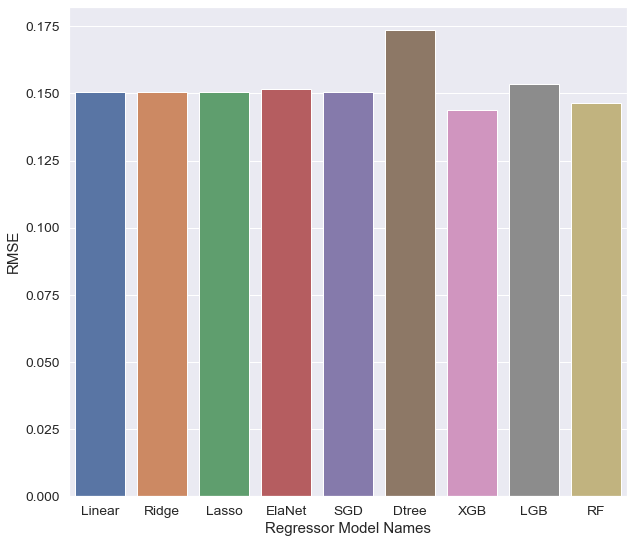

In [364]:
fig, ax = plt.subplots()
fig.set_size_inches(10,9)
sns.barplot(x=regressor_list, y=scores_list, ax=ax)
plt.ylabel('RMSE')
plt.xlabel('Regressor Model Names')

- According to the plots above **RandomForest Regressor** has the lowest **RMSE(Root Mean Square Error)** score in comparision to other regressor models; It is possible that through proper hyperparameter the models including random forest could still have a much lower RMSE.

In [371]:
## Comparing the predictions generated by each of the regression models
predictions = {'linear' : grid_linear.predict(Xtesc), 'Ridge' : grid_ridge.predict(Xtesc), 'Lasso' : grid_lasso.predict(Xtesc), 'Elastic Net' : grid_elas.predict(Xtesc), 'SGD' : grid_sgdr.predict(Xtesc), 'Decision Tree' : grid_dtree.predict(Xtesc), 'XGBoost' : grid_xgbr.predict(Xtesc), 'LGBoost' :grid_lgbr.predict(Xtesc), 'RandomForest' : grid_rf.predict(Xtesc)}

df_pred = pd.DataFrame(predictions)
df_pred.corr()

,linear,Ridge,Lasso,Elastic Net,SGD,Decision Tree,XGBoost,LGBoost,RandomForest
linear,1.000000,0.999982,0.999967,0.998745,0.999847,0.947159,0.980218,0.973160,0.982922
Ridge,0.999982,1.000000,0.999987,0.999025,0.999784,0.947260,0.980269,0.973171,0.983162
Lasso,0.999967,0.999987,1.000000,0.999047,0.999814,0.947315,0.980262,0.973147,0.983158
Elastic Net,0.998745,0.999025,0.999047,1.000000,0.998224,0.946959,0.979657,0.972271,0.983858
SGD,0.999847,0.999784,0.999814,0.998224,1.000000,0.947084,0.979603,0.972574,0.982205
Decision Tree,0.947159,0.947260,0.947315,0.946959,0.947084,1.000000,0.955773,0.963915,0.964055
XGBoost,0.980218,0.980269,0.980262,0.979657,0.979603,0.955773,1.000000,0.990878,0.990689
LGBoost,0.973160,0.973171,0.973147,0.972271,0.972574,0.963915,0.990878,1.000000,0.991174
RandomForest,0.982922,0.983162,0.983158,0.983858,0.982205,0.964055,0.990689,0.991174,1.000000


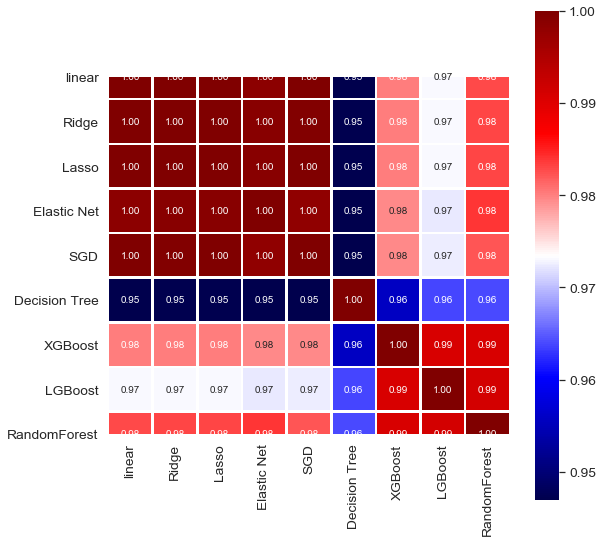

In [372]:
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.25)
sns.heatmap(df_pred.corr(), linewidths=1.5, cmap='seismic', annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=df_pred.columns , xticklabels=df_pred.columns
            )

### Summary
1. Exploration of the Data to examine and understand any underlying data patterns such as descriptive statistics and missing values.
2. Measuring the skewness and kurtosis of the target variable and doing a log transformation to correct it.
3. Correlation of the numeric features to the target variable was done to visualize the strongly correlated numeric features to the target variable.
4. Data Wrangling was done for the categorical features to transform them into numeric form that can effectively be used to train the model. 
5. After data wrangling, correlation of the categorical features was done to determine the features with strong correlation to the target variable.
6. Model training and Prediction: GridSearchCV and RandomisedsearchCV were performed on the regressor models to get the best hyperparameters for each of the models. Thereafter, prediction was done based on the model with the lowest Root Mean Square Error (RMSE).
